<div style="margin: 0 auto 30px; height: 60px; border: 2px solid gray; border-radius: 6px;">
  <div style="float: left;"><img src="img/epfl.png" /></div>
  <div style="float: right; margin: 20px 30px 0; font-size: 10pt; font-weight: bold;"><a href="https://moodle.epfl.ch/course/view.php?id=18253">COM202 - Signal Processing</a></div>
</div>
<div style="clear: both; font-size: 30pt; font-weight: bold; color: #483D8B;">
    Lab 2: Introduction to NumPy
</div>

In [2]:
# First things first, import numpy (as almost always)
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [3]:
plt.rcParams["figure.figsize"] = (14,4)

NumPy is a solid library that provides lots of built in functions specifically designed for vector and matrix operations. While this seems a bit useless for you now (after having to compute all these matrices by hand without knowing why), it will quickly one of the most useful tools in lots of applications throughout your studies. 

To get you started, this lab will focus on some simple linear algebra operations using NumPy and present a final application in image processing using the so-called Haar Basis.

# NumPy Arrays

There are two standard ways of creating NumPy arrays:
 * transform a usual array object using ``np.array`` 
 * use NumPy's built-in functions

In [4]:
# Here we create an array from a Python array.
matr = np.array([[1,2,3],[4,5,6]])

# There exists various built-in functions to easily create different array-like objects:
vect = np.ones(5)

id_matrix = np.eye(5)

one_matrix = np.ones((5,3))

zero_matrices = np.zeros((2,3,3))

print("1D vector: \n{}\n".format(vect))
print("2D matrix: \n{}\n".format(matr))
print("Identity matrix: \n{}\n".format(id_matrix))
print("1 matrix: \n{}\n".format(one_matrix))
print("array of 0 matrix: \n{}\n".format(zero_matrices))

1D vector: 
[1. 1. 1. 1. 1.]

2D matrix: 
[[1 2 3]
 [4 5 6]]

Identity matrix: 
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]

1 matrix: 
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

array of 0 matrix: 
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]]



## Data types

Even though Python is not a static-typed language, you can still declare a variable' type via the syntax 

``variable:type=value``

Note that all NumPy arrays always refer to an underlying data type; you can specify the type at creation time via the directive

``dtype=...``

or you cast existing arrays using the ``.astype()`` method.

In [5]:
# Creating an array of integers
int_vect = np.array([1,2,3,4,5], dtype=np.int32)
print(int_vect.dtype)

# Cast int array to float array:
float_vect = int_vect.astype(np.float32)
print(float_vect.dtype)

# As we can see, multiplying with standard * two vectors will simply multiply components pairwise
# and output another vector. In fact we will see later on why.
print(int_vect * float_vect)

int32
float32
[ 1.  4.  9. 16. 25.]


The features of NumPy arrays can be inspected via a series of attributes such as ``size``, ``shape``, and ``ndim``. This is particularly useful when working with multi-dimensional vectors or matrices.  

In [6]:
matr = np.array([[1,2,3,4],[5,6,7,8]])
print("The dimension of the matrix is: {}\n".format(matr.ndim))
print("The shape of the matrix is: {}\n".format(matr.shape))
print("The size of the matrix is: {}\n".format(matr.size))
print("The data type of the matrix is: {}\n".format(matr.dtype))

The dimension of the matrix is: 2

The shape of the matrix is: (2, 4)

The size of the matrix is: 8

The data type of the matrix is: int32



## Reshaping

The structure of NumPy arrays can be modified using is the ``.reshape()`` method; note that the new shape must contain the same number of elements as the original shape. 

In [7]:
# Creating a matrix of sequentials numbers:
matr = np.arange(10,20).reshape(5,2)
print("A matrix of size 5,2:\n{}\n".format(matr))

matr = matr.reshape(2,5)
print("A matrix of size 2,5:\n{}\n".format(matr))

A matrix of size 5,2:
[[10 11]
 [12 13]
 [14 15]
 [16 17]
 [18 19]]

A matrix of size 2,5:
[[10 11 12 13 14]
 [15 16 17 18 19]]



## Accessing data with slicing

One elegant and easy way of accessing data in arrays is by the mean of slicing. Slices are specific subsets of the array data. 

The standard notation for a 1D array would be ``start:end:step`` where ``end`` is exclusive. If ``end`` is omitted, it defaults to the end of the array (inclusive).

In [8]:
# Create a 1D array of sequential numbers.
vect = np.arange(12)
print("The first five elements are: {}\n".format(vect[:5]))
print("The even elements of the array are: {}\n".format(vect[::2]))

# It is also useful when trying to change only specific parts of the array.
vect_1_added = vect.copy()
vect_1_added[::2] += 1
print(vect_1_added, "\n")

# Creating a matrix of size 10x10 filled with 0s.
matr = np.zeros((11,11), dtype=np.int32)

# Adding ones on the 5th column:
matr[:, 5] = 1
print("The matrix with 1s only on 5th column:\n{}\n".format(matr))

# Adding ones to 5th row:
matr[5, :] = 1
print("The matrix with 1s only on 5th column and 5th row:\n{}\n".format(matr))

The first five elements are: [0 1 2 3 4]

The even elements of the array are: [ 0  2  4  6  8 10]

[ 1  1  3  3  5  5  7  7  9  9 11 11] 

The matrix with 1s only on 5th column:
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]

The matrix with 1s only on 5th column and 5th row:
[[0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0]]



## Broadcasting

Last but not least, broadcasting is a built-in method used by NumPy to apply transformations to arrays in an elegant and concise way. When appling operations to arrays of different sizes, NumPy attempts to extend ("broadcast") the smaller array so that it matches the size of the larger one. 

For example, when adding a vector ``vect`` to a matrix ``M``, the broadcasting step will expand the vector into a properly sized matrix.

In [9]:
# Create a vector of length 5
vect = np.array([1,2,3,4,5])

# Matrix of 1s
matr = np.ones((4,5), dtype=np.int64)

print("The matrix: \n{}\n and the vector:{}\n".format(matr, vect))

res_1 = vect + matr 
print("Adding vect to matrix gives: \n{}\n".format(res_1))

# Note that you need at least ONE matching dimension:
matr_2 = np.ones((4,4,5), dtype=np.int64)
res_2 = matr_2 + vect

print("Adding vect to array of matrices gives: \n{}\n".format(res_2))

The matrix: 
[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]
 and the vector:[1 2 3 4 5]

Adding vect to matrix gives: 
[[2 3 4 5 6]
 [2 3 4 5 6]
 [2 3 4 5 6]
 [2 3 4 5 6]]

Adding vect to array of matrices gives: 
[[[2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]]

 [[2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]]

 [[2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]]

 [[2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]
  [2 3 4 5 6]]]



Be aware that, for broacasting to work, the arrays must have at least one matching dimension:

In [10]:
# Create a vector of length 5
vect = np.array([1,2,3,4,5])

# Matrix of 1s of size 4x6
matr = np.ones((4,6), dtype=np.int64)

try:
    res_3 = matr + vect
except ValueError as error:
    print("Broadcasting error: ", error)

Broadcasting error:  operands could not be broadcast together with shapes (4,6) (5,) 


More details on broadcasting are availabe [here](https://numpy.org/devdocs/user/basics.broadcasting.html).

## Your turn!

### Exercise: reshaping a vector into a matrix

The following code takes all the pixels in a square image and stores them one after the other in a single 4096-element vector.

In [11]:
original_image = np.array(plt.imread('img/cameraman.jpg'), dtype=int)
vect = np.ravel(original_image, "C")

Write the code to reshape the vector into the original square image:

In [12]:
img = vect.reshape(64,64,order='C') # write your code here

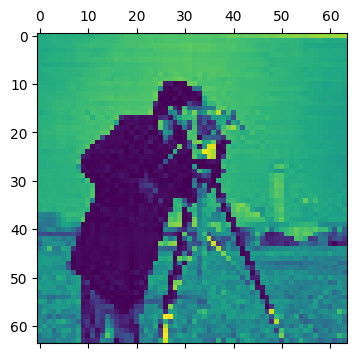

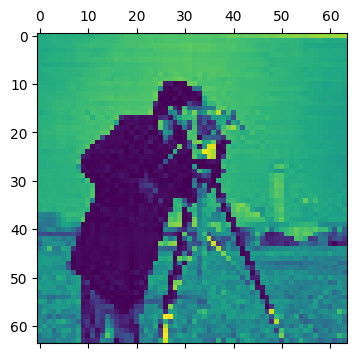

In [13]:
# You can use these to compare your result. 
plt.matshow(original_image)
plt.matshow(img)

### Exercise: slicing

Consider the following two-dimensional array:

In [14]:
a = np.array([[1,  2,  3,  4],
              [5,  6,  7,  8],
              [9, 10, 11, 12]])

Use slicing to extract the following subarrays:
- The second row of the array.
- The second column of the array.
- The subarray consisting of the first two rows and the first two columns.
- The subarray consisting of the last two rows and the last two columns.

In [15]:
# your code here
print(a[1]) # Second row
print(a[:,1]) # Second column
print(a[:2,:2]) # First two rows and columns
print(a[-2:,-2:]) # Last two rows and columns

[5 6 7 8]
[ 2  6 10]
[[1 2]
 [5 6]]
[[ 7  8]
 [11 12]]


Use slicing to modify the following subarrays:
- Replace the second row with the values [13, 14, 15, 16].
- Replace the third column with the values [17, 18, 19].
- Replace the subarray consisting of the first two rows and the first two columns with the values [[20, 21], [22, 23]].
- Use slicing to extract all the elements of the array except for the first row and the last column.

In [16]:
# your code here
b = a.copy()
b[1] = [13,14,15,16] # Replace second row
print(b)
b = a.copy()
b[:,2] = [17,18,19] # Replace third column
print(b)
b = a.copy()
b[:2,:2]=[[20,21],[22,23]] # Replace first two rows and columns
print(b)
b = a.copy()
print(b[1:,:-1])

[[ 1  2  3  4]
 [13 14 15 16]
 [ 9 10 11 12]]
[[ 1  2 17  4]
 [ 5  6 18  8]
 [ 9 10 19 12]]
[[20 21  3  4]
 [22 23  7  8]
 [ 9 10 11 12]]
[[ 5  6  7]
 [ 9 10 11]]


# Linear algebra with NumPy

## Basic operators

In NumPy, most of the common linear algebra operations are already implemented. 
- inner product (aka dot product) of two vectors: ``np.vdot``
- matrix-vector or matrix-matrix standard multiplication: ``np.dot(M1,v1)`` or ``@`` 
- matrix inversion: ``np.linalg.inv``. 
- matrix transposition: ``.T``. 
- matrix L2 norm: ``np.linalg.norm``.
- solving a system of linear equations: ``np.linalg.solve``.

You can find many other useful information [here](https://numpy.org/doc/stable/reference/routines.linalg.html).

In [17]:
# If we instantiate two vectors:
v_1 = np.random.rand(5)
v_2 = np.random.rand(5) * (-1)

v_dot = np.vdot(v_1, v_2)
print("v_1 is:{}\nv_2 is:{}".format(v_1, v_2))
print("Their dot product is: {}".format(v_dot))

# If we instantiate one matrix and one vector:
M_1 = np.arange(1, 7).reshape(3, 2)
v_1 = np.ones(2)
M_dot = np.dot(M_1, v_1)
print("The matrix vector product gives a vector of size 3x1: {}".format(M_dot))

# If we instantiate two matrices:
M_1 = np.array([[1, 2], [3, 4], [5, 6]])
M_2 = np.array([[1, 2, 3], [4, 5, 6]])
M_dot = np.dot(M_1, M_2)
print("The matrix product gives a matrix of size 3x3: \n{}".format(M_dot))

v_1 is:[0.66024478 0.28655879 0.69852338 0.24591684 0.45278854]
v_2 is:[-0.20581445 -0.62924015 -0.19561813 -0.47458456 -0.30807591]
Their dot product is: -0.7090476267462386
The matrix vector product gives a vector of size 3x1: [ 3.  7. 11.]
The matrix product gives a matrix of size 3x3: 
[[ 9 12 15]
 [19 26 33]
 [29 40 51]]


### Exercise: matrix-vector operations

Let $A$ be the matrix : $$A = \begin{bmatrix} 1 & 2 & 1 \\ 3 & 0 & 1 \\ 0 & 2 & 4 \end{bmatrix}$$
and $\mathbf{v, w}$ the vectors: $$\mathbf{v} = \begin{bmatrix} 1 \\ 2 \\ 4 \end{bmatrix} \\ \mathbf{w} = \begin{bmatrix} 2 \\ 4 \\ 6 \end{bmatrix}$$

Complete the code below. 

In [18]:
# define the matrix A and the vectors v and w
A = np.matrix([[1, 2, 1], [3, 0, 1], [0, 2, 4]])
v = np.array([1, 2, 4])
w = np.array([2, 4, 6])


# compute the product of matrix A and vector v
print("Av = ", np.dot(A, v))

# compute the product of the transpose of vector w and matrix A
print("w^T A = ", np.dot(w.T, A))

# compute the dot product of vectors v and w
print("< v , w > = ", np.dot(v, w))

# compute the transpose of matrix A
print("A^T = ", A.T)

Av =  [[ 9  7 20]]
w^T A =  [[14 16 30]]
< v , w > =  34
A^T =  [[1 3 0]
 [2 0 2]
 [1 1 4]]


### Exercise: linear systems of equations

Solve the following linear system of equations:

$$
\left\{
    \begin{align*}
        2x_0 + x_1 &= 10 \\
        x_0 - 3x_1 &= -4
    \end{align*}
\right.
$$

In [19]:
# your code
A = np.array([[2,1],[1,-3]])
b = np.array([10,-4])
print(np.linalg.solve(A,b))
print(np.dot(np.linalg.inv(A),b))
print(np.allclose(np.dot(A,np.linalg.solve(A,b)),b))

[3.71428571 2.57142857]
[3.71428571 2.57142857]
True


## Change of basis

A vector space has an infinite number of possible bases and we can move from the representation in one base to another via a change of basis matrix. 

Assume we are in $\mathbb{R}^N$ and that we have a basis $\{\mathbf{v}_k\}$, $k = 0, 1, \ldots, N-1$. Any vector in $\mathbb{R}^N$ can be expressed as the linear combination

$$
  \mathbf{x} = \sum_{n=0}^{N-1} \alpha_n \mathbf{v}_n
$$

for a given set of coefficients $\alpha_n$. If we build an $N \times N$ matrix $\mathbf{V}$ where the _columns_ are the $N$ basis vectors, we can write in compact form

$$
  \mathbf{x} = \mathbf{V}\begin{bmatrix} \alpha_0 \\ \vdots \\ \alpha_{N-1} \end{bmatrix}
$$

Consider now another basis $\{\mathbf{w}_k\}$ and use these new basis vectors as the columns of a matrix $\mathbf{W}$; the goal is to find a set of $N$ coefficients $\beta_n$ so that

$$
  \mathbf{x} = \mathbf{W}\begin{bmatrix} \beta_0 \\ \vdots \\ \beta_{N-1} \end{bmatrix}
$$

We have

$$
  \begin{bmatrix} \beta_0 \\ \vdots \\ \beta_{N-1} \end{bmatrix} = \mathbf{W}^{-1}\mathbf{x} = \mathbf{W}^{-1}\mathbf{V}\begin{bmatrix} \alpha_0 \\ \vdots \\ \alpha_{N-1} \end{bmatrix}
$$

The $N\times N$ matrix $\mathbf{C} = \mathbf{W}^{-1}\mathbf{V}$ is called the "change of basis matrix. 

### Exercise: change of basis matrix

The following function generates a random basis for $\mathbb{R}^N$ and returns the basis vectors (whose elements are integer-valued) as the columns of an $N \times N$ matrix (for more details, if you're curious, see [here](https://en.wikipedia.org/wiki/Diagonally_dominant_matrix)).

In [20]:
def random_basis(N):
    V = (-5 + 10 * np.random.rand(N, N)).astype(int)
    mx = np.sum(np.abs(V), axis=1)
    np.fill_diagonal(V, mx)
    return V

Write a function that takes two bases as input and returns the change-of-basis matrix from the first basis to the second. 

In [21]:
def cob(V, W):
    # your code here
    return np.dot(np.linalg.inv(W),V)

Let's test it a few times:

In [22]:
for n in range(0, 100):
    V = random_basis(5)    
    W = random_basis(5)
    C = cob(V, W)
    if not np.allclose(np.linalg.det(V)/np.linalg.det(W), np.linalg.det(C)):
        print("oups, numerical precision issues?")

# Basis vectors for telecommunications

A discrete-time signal can be considered as a vector $\mathbf{x}$ in a high-dimensional space. When we consider the sequence of samples in a signal, we are implicitly using the canonical basis and every sample is thus associated to a single basis vector. 

If you try and transmit the signal over a medium that may corrupt the transmitted values, errors are going to affect every sample independently. One key idea in robust data transmission is to encode the signal using a different basis that provides more robustness with respect to data loss.

In this section we will explore one such basis, called the Haar basis.

## The search for a good basis

When looking for a good basis, these are our usual wishes:

 * we want the basis to be orthonormal (or at least orthogonal) so that basis decomposition is obtained simply via a series of inner products;
 * we want the basis to be able to represent the signal information robustly so that a few basis vectos can capture most of the information contained in the signal. This will ensure resilence against data loss;
 * we want the basis to be easy to compute.

One such basis is the **Haar basis**. While we cannot go into too many details in this notebook, curious people can read further on the topic [here](https://chengtsolin.wordpress.com/2015/04/15/real-time-2d-discrete-wavelet-transform-using-opengl-compute-shader/). Mathematical formulas aside, the Haar basis works by encoding the information in a *hierarchical* way: 
 * the first basis vector encodes the average value of the signal
 * the second basis vector encodes the difference between the averages of the first and second halves of the signal
 * and so on, with every subsequent basis vector encoding more detailed information
 
With this encoding, we can "get away" with having even only a few coefficients survive the transmission process and we can still have a good approximation of the original signal. 

## The Haar basis

To keep things simple, we will limit ourselves to real-valued signals whose length is a power of two. The following function computes the Haar basis for $\mathbb{R}^{2^M}$; it returns a matrix whose columns contain the $2^M$ basis vectors.

In [23]:
def haar_basis(M):
    N = 2 ** M

    z = np.resize(1.*np.arange(N)/N, (len(1.*np.arange(N)), len(1.*np.arange(N)/N)))
    k = np.transpose(np.resize(1.*np.arange(N), (len(1.*np.arange(N)/N), len(1.*np.arange(N)))))
    
    p  = np.floor(np.log(np.maximum(1,k))/np.log(2))
    q  = k - (2**p) + 1
    z1 = (q-1)/(2**p)
    z2 = (q-0.5)/(2**p)
    z3 = q/(2**p)
    A  = (1/np.sqrt(N)) * ((( 2**(p/2.)) * ((z >= z1) & (z < z2))) + ((-2**(p/2.)) * ((z >= z2) & (z < z3))))
    A[0,:] = 1/np.sqrt(N)
    return A.T

Let's look at the basis vectors for a space of size $2^3 = 8$:

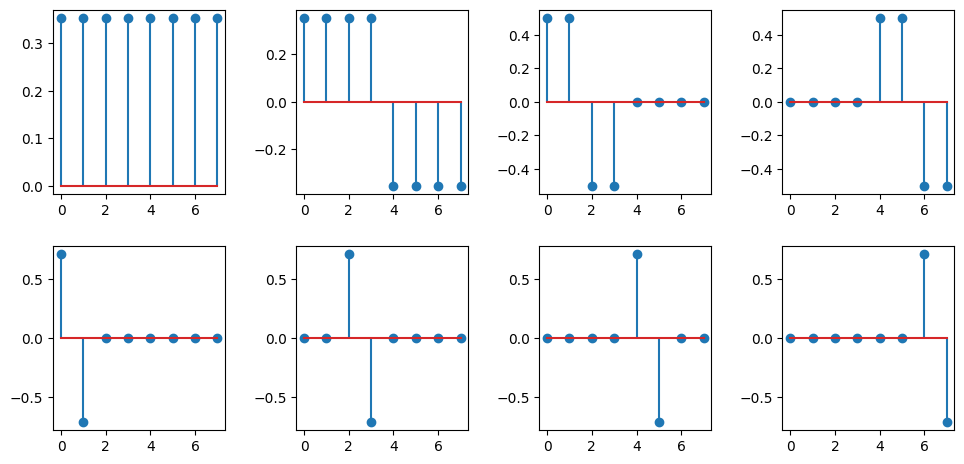

In [24]:
plt.figure(figsize=(10,5))
H = haar_basis(3)
for n in range(0, 8):
    plt.subplot(2, 4, n + 1)
    plt.stem(H[:,n])
plt.tight_layout(pad=2)

### Exercise: check for orthogonality

Verify that the Haar basis is indeed an orthonormal basis

In [25]:
# your code here
H = haar_basis(3)
print(np.allclose(np.dot(H.T,H),np.eye(len(H))))
print(np.allclose(np.dot(H,H.T),np.eye(len(H))))

True
True


In [34]:
haar_basis(8)

array([[ 0.0625    ,  0.0625    ,  0.08838835, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0625    ,  0.0625    ,  0.08838835, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.0625    ,  0.0625    ,  0.08838835, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.0625    , -0.0625    ,  0.        , ...,  0.        ,
        -0.70710678,  0.        ],
       [ 0.0625    , -0.0625    ,  0.        , ...,  0.        ,
         0.        ,  0.70710678],
       [ 0.0625    , -0.0625    ,  0.        , ...,  0.        ,
         0.        , -0.70710678]])

## Signal decomposition in the Haar Basis

Let's first see if we can correctly encode a basic signal in the Haar basis and reconstruct it afterwards. Since the basis is orthonormal, this is an easy task.

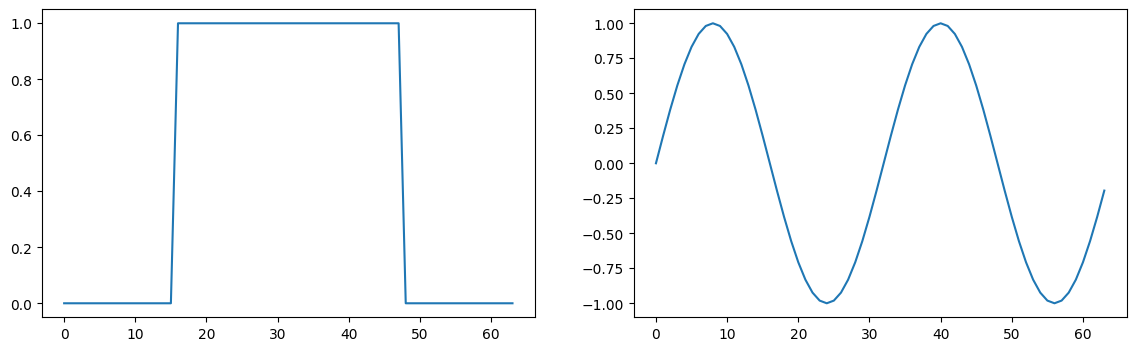

In [27]:
# Let's define some test signals of length 64
M = 6
N = 2 ** M

test_signal = [np.zeros(N), np.zeros(N)]
# first test signal is a box sequence
test_signal[0][(N//4):(N//4 + N//2)] = 1

# second one a sinusoid that completes 2 periods over the length of the signal
test_signal[1] = np.sin(4 * np.pi * np.arange(0, N) / N)

for n, sig in enumerate(test_signal):
    plt.subplot(1, 2, n+1)
    plt.plot(test_signal[n])

### Exercise: decomposition and reconstruction

Write a function to compute the Haar decomposition of a test signal and another function to reconstruct a signal from its Haar coefficients

In [28]:
def haar_decomposition(x):
    # your code here
    N = len(x)
    M = int(np.log2(N))
    assert 2**M == N, "N must be a power of 2"
    return np.dot(haar_basis(M).T,x)


In [29]:
def haar_reconstruction(x):
    # your code here
    N = len(x)
    M = int(np.log2(N))
    assert 2**M == N, "N must be a power of 2"
    return np.dot(haar_basis(M),x)

Let's check it out on the test signals we defined earlier:

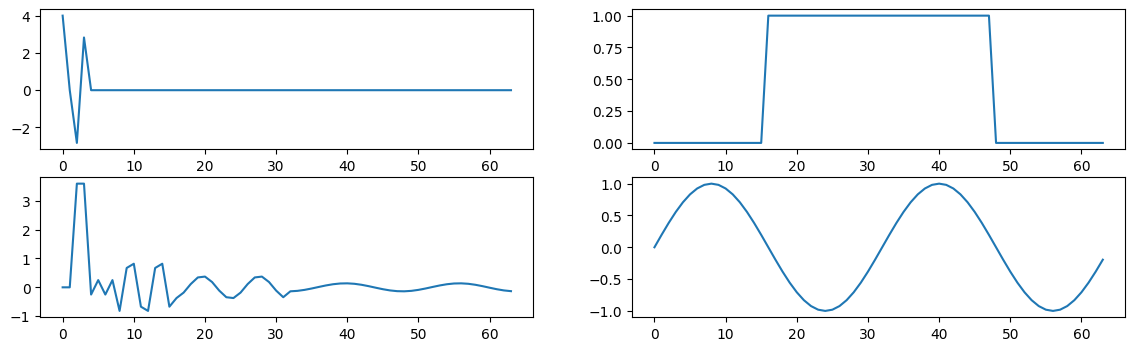

In [30]:
for n, sig in enumerate(test_signal):
    hc = haar_decomposition(sig)
    plt.subplot(2, 2, 2*n+1)
    plt.plot(hc)    
    plt.subplot(2, 2, 2*n+2)
    plt.plot(haar_reconstruction(hc))

## Robustness of the Haar representation

As you should have noticed from the previous example, decomposing the test signals onto the Haar basis results in a set of values where many of the coefficients are small. If we end up "losing" some of the coefficients that are small in magnitude, the impact on the reconstruction will be more tolerable in terms of overall error. 

Let's verify this assumption by recontructing the test signals from only the first $k$ largest Haar coefficients:

In [31]:
def compress(x, k):
    hc = haar_decomposition(x)
    idx = np.argsort(np.abs(hc))[::-1][:k]
    coeff_subset = np.zeros(len(x))
    coeff_subset[idx[:k]] = hc[idx[:k]]
    return haar_reconstruction(coeff_subset)

For the box function, only a few coefficients are enough:


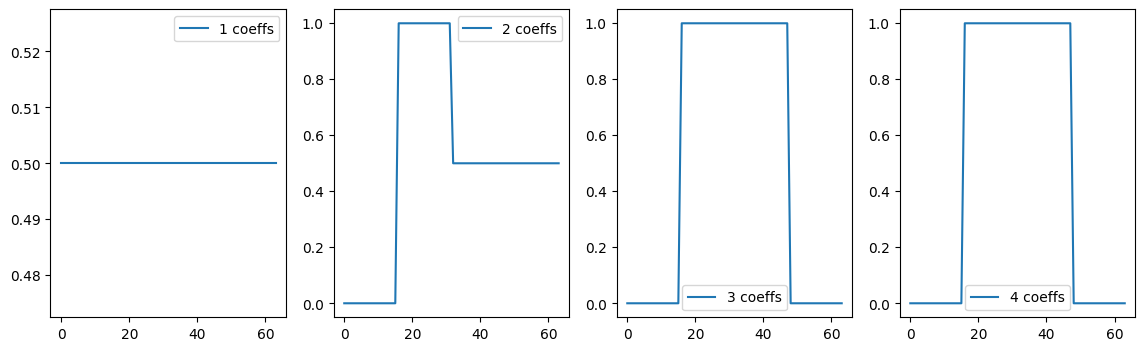

In [32]:
P = 4
for p in range(1, P+1):
    plt.subplot(P // 4, 4, p)
    k = p
    plt.plot(compress(test_signal[0], k), label=f'{k} coeffs')
    plt.legend()

whereas for the sine function the approximation converges more slowly:

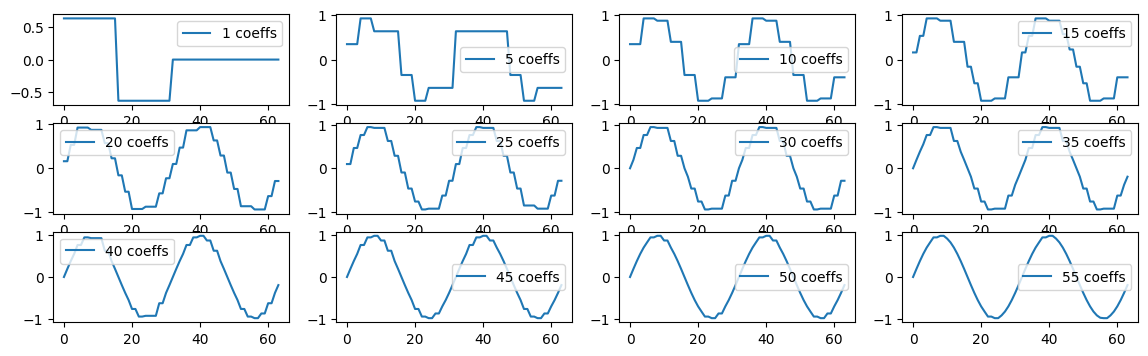

In [33]:
P = 12
for p in range(1, P+1):
    plt.subplot(P // 4, 4, p)
    k = 1 if p == 1 else (p - 1) * 5
    plt.plot(compress(test_signal[1], k), label=f'{k} coeffs')
    plt.legend()